# Experiment 2


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from scipy.optimize import curve_fit

# Sample dataset
# X: independent variable, y: dependent variable

In [4]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([2.5, 3.5, 7.1, 10.2, 10.9, 14.5, 17.1, 18.3, 20.9, 25.2])

# Linear Regression

In [12]:
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# Non-linear curve fitting
# Define a quadratic function for non-linear regression

In [13]:
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

In [14]:
params, _ = curve_fit(quadratic, X.flatten(), y)
a, b, c = params
y_pred_nonlinear = quadratic(X.flatten(), a, b, c)


# Error Calculation

In [15]:
mse_linear = mean_squared_error(y, y_pred_linear)
mae_linear = mean_absolute_error(y, y_pred_linear)

mse_nonlinear = mean_squared_error(y, y_pred_nonlinear)
mae_nonlinear = mean_absolute_error(y, y_pred_nonlinear)


# Display results

In [16]:
print("Linear Regression Results:")
print(f"  Coefficients: {linear_model.coef_}")
print(f"  Intercept: {linear_model.intercept_}")
print(f"  MSE: {mse_linear:.3f}")
print(f"  MAE: {mae_linear:.3f}")

print("\nNon-linear Regression Results:")
print(f"  Parameters (a, b, c): {params}")
print(f"  MSE: {mse_nonlinear:.3f}")
print(f"  MAE: {mae_nonlinear:.3f}")

Linear Regression Results:
  Coefficients: [2.4630303]
  Intercept: -0.5266666666666637
  MSE: 0.547
  MAE: 0.681

Non-linear Regression Results:
  Parameters (a, b, c): [ 0.02310606  2.20886364 -0.01833333]
  MSE: 0.519
  MAE: 0.672


# Plot results

In [17]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

# Original data

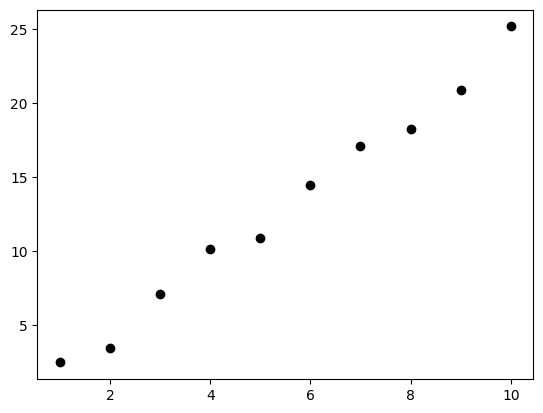

In [18]:
plt.scatter(X, y, color="black", label="Original Data")

# Linear regression line

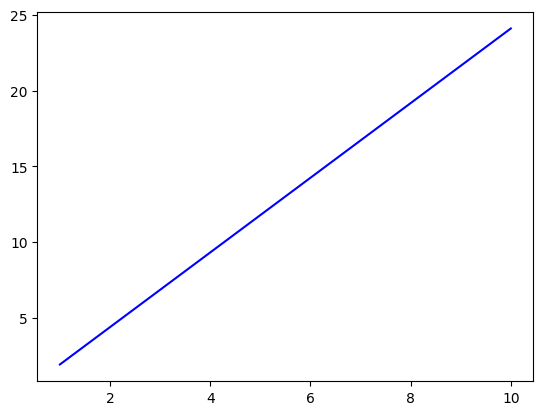

In [19]:
plt.plot(X, y_pred_linear, color="blue", label="Linear Regression")

# Non-linear regression curve

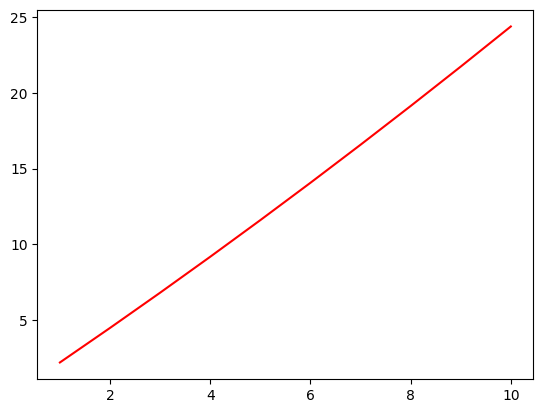

In [20]:
plt.plot(X, y_pred_nonlinear, color="red", label="Non-linear Regression (Quadratic)")

# Labels

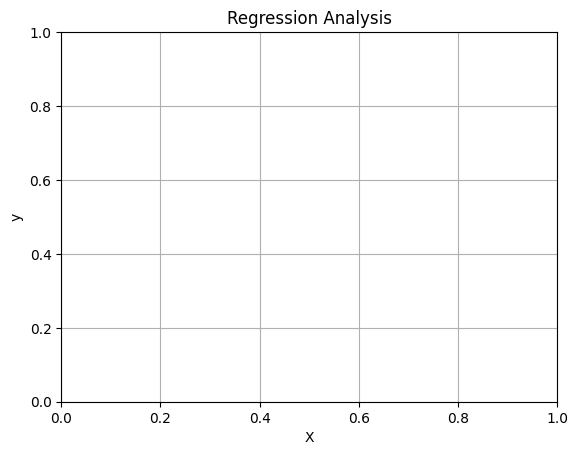

In [21]:
plt.title("Regression Analysis")
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()